#### Carregando a base de dados

In [3]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_credit_data.pkl', mode = 'rb') as arquivo:
    x_previsores, y_classes, x_teste, y_teste = pickle.load( arquivo )

In [4]:
x_previsores.shape, y_classes.shape

((1500, 3), (1500,))

In [5]:
x_teste.shape, y_teste.shape

((500, 3), (500,))

#### Aplicação do aprendizado

In [13]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(
    hidden_layer_sizes = (3,3),  # Camadas ocultas - 3 entrada + 2 saída = 5. 5/2 = 2.5 ... 3 neuronios para camadas ocultas
    activation = 'relu',  # Função de ativação
    max_iter = 2000,  # Quantidade de épocas
    tol=0.00001,  # Tolerância a mudança de erro
    verbose=True
)

# Ajuste e previsão
modelo.fit(x_previsores, y_classes)

Iteration 1, loss = 0.42422329
Iteration 2, loss = 0.41836486
Iteration 3, loss = 0.41308547
Iteration 4, loss = 0.40862466
Iteration 5, loss = 0.40416398
Iteration 6, loss = 0.40044398
Iteration 7, loss = 0.39696176
Iteration 8, loss = 0.39364486
Iteration 9, loss = 0.39060084
Iteration 10, loss = 0.38770699
Iteration 11, loss = 0.38495022
Iteration 12, loss = 0.38233026
Iteration 13, loss = 0.37963635
Iteration 14, loss = 0.37712173
Iteration 15, loss = 0.37456872
Iteration 16, loss = 0.37204276
Iteration 17, loss = 0.36957077
Iteration 18, loss = 0.36706911
Iteration 19, loss = 0.36455113
Iteration 20, loss = 0.36205668
Iteration 21, loss = 0.35955324
Iteration 22, loss = 0.35698353
Iteration 23, loss = 0.35449746
Iteration 24, loss = 0.35182644
Iteration 25, loss = 0.34928446
Iteration 26, loss = 0.34666047
Iteration 27, loss = 0.34403468
Iteration 28, loss = 0.34140711
Iteration 29, loss = 0.33869709
Iteration 30, loss = 0.33598775
Iteration 31, loss = 0.33327456
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=2000, tol=1e-05, verbose=True)

In [14]:
previsao = modelo.predict(x_teste)

In [15]:
from sklearn.metrics import accuracy_score

print(f'Precisão do modelo: {accuracy_score( y_teste, previsao)*100:.2f}%')

Precisão do modelo: 100.00%


#### Visualizando resultados do modelo

In [16]:
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel
from sklearn.metrics import classification_report

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "0", 436 previsões estão corretas e 0 estão incorretas.**

<br>

**Para a classe "1", 64 previsões estão corretas e 0 estão incorretas.**

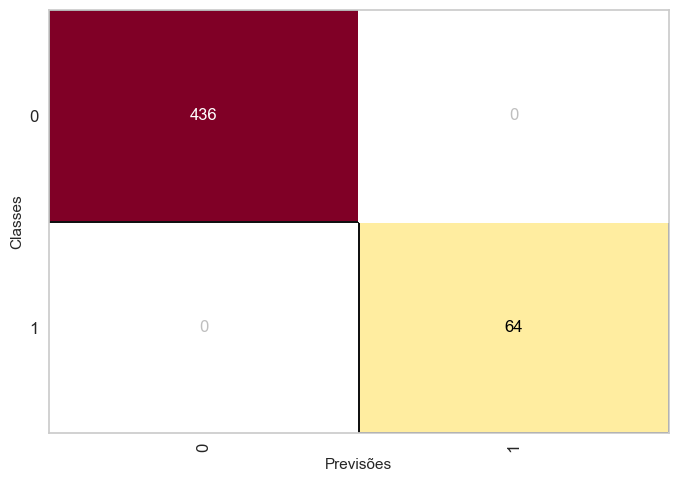

In [17]:
cm = ConfusionMatrix( modelo )
cm.fit( x_previsores, y_classes )
cm.score( x_teste, y_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [18]:
print(classification_report( y_teste, previsao ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00        64

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

